In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab

In [2]:
plt.rcParams["figure.figsize"] = (10,8)

# Reviewing Basic Statistics

## Part 1 and 2: Simple Linear Regression

In [3]:
# Load the Mauna Loa CO2 Data
df = pd.read_csv('../dataset/mauna_loa_CO2.csv', names=['time', 'co2'])
df.head()

,time,co2
0,1959.000,315.42
1,1959.083,316.31
2,1959.167,316.50
3,1959.250,317.56
4,1959.333,318.13


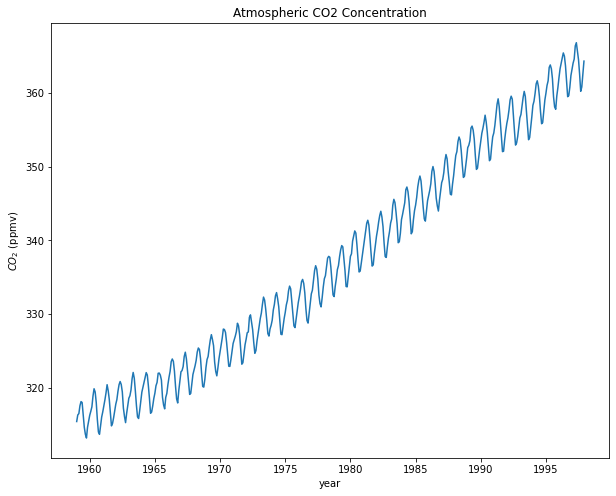

In [4]:
plt.plot(df.time, df.co2)
plt.xlabel('year')
plt.ylabel('$CO_2$ (ppmv)')
plt.title('Atmospheric CO2 Concentration');

We could tell from the picture that there are missing data.  
Let's check that.

In [5]:
# Develop the linear model
X = df.time.values.reshape(-1, 1)
y = df.co2
lm = LinearRegression().fit(X,y)
y_pred = lm.predict(X)

In [6]:
slope = lm.coef_
intercept = lm.intercept_

print('Coefficients: ')
print(f'Intercept: {intercept}')
print(f'time(co2): {slope}')      

Coefficients: 
Intercept: -2249.7737356437856
time(co2): [1.30749646]


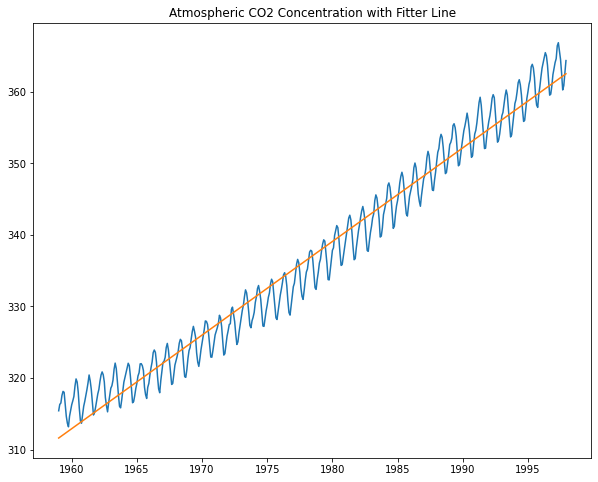

In [7]:
# plot the data with the line:
plt.plot(X, df['co2'])
plt.plot(X, y_pred)
plt.title('Atmospheric CO2 Concentration with Fitter Line');

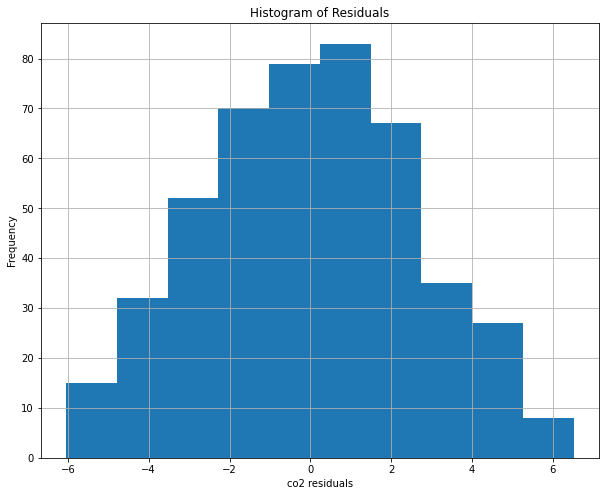

In [8]:
# Let's look at the residuals
residuals = df.co2 - y_pred
residuals.hist(bins=10)
plt.xlabel('co2 residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

As we look at the histogram, we can see that it's roughly symmetric and mount shaped. But it seems to depart from a normal distribution, especially as we look at the tails. 

We would like a somewhat less subjective way of looking at this. Also, if you have an abundance of data, you have hundreds of data points. A histogram is a valid approach for looking at structure your data. If you only have 10 or 15 data points, a histogram is not the best way to go, we could probably do better, in particular if we're assessing normality by plotting the so called **normal probability plot**

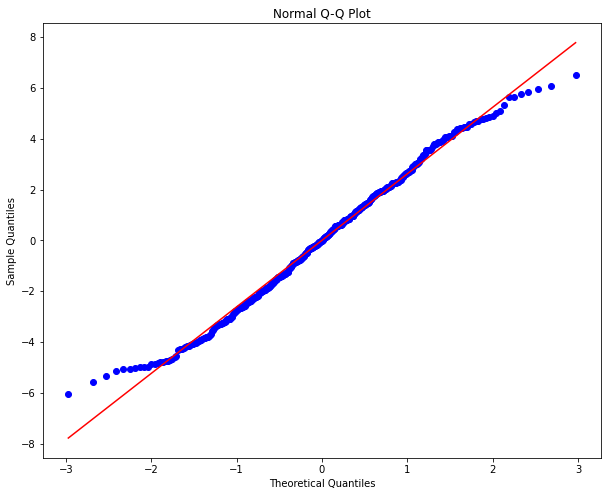

In [9]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles');

If our residuals are normally distributed, we would expect to see most of our data essentially looking linear, like a straight line you could fit on this plot.  
Here, we see some systematic departures from the lower and upper tail and so it lets me question the normal assumption a bit. 
These departures seem to be more systematic than random. So the residuals here appear to be roughly normally distributed but not exactly normally distributed.   
There is a structural systematic deviation from normality. --> The residual normality assumption is not being satisfied.

<div class="alert alert-block alert-info">
<b>💡</b> So the first thing to do after training a model is to ask if our residuals are normally destributed. And the best way to check this is to do a Q-Q plot and not a histogram!
</div>


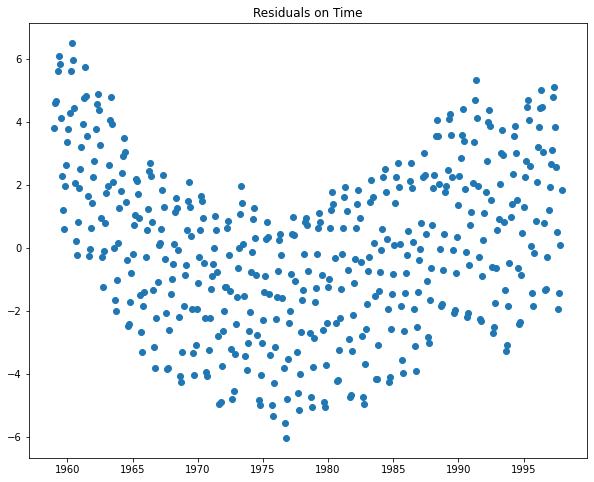

In [10]:
# Another important thing to do is a time plot of the residuals
plt.scatter(df.time, residuals)
plt.title('Residuals on Time');

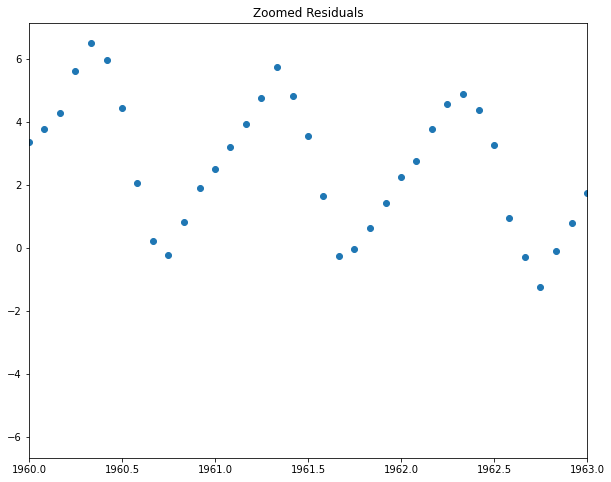

In [11]:
# So let's zoom in on our residuals, precisely there where the normality assumption
# is not satisfied
plt.scatter(df.time, residuals)
plt.xlim([1960, 1963])
plt.title('Zoomed Residuals');

<div class="alert alert-block alert-success">
    <b> What we've learned in this 1st Part:</b>
<ul>
    <li> plot time series data ✅  </li>
    <li> fit a linear model to a set of ordered pairs ✅  </li>
    <li> assess normality of residuals ✅  </li>
</div>